In [17]:
import pandas as pd
import os
import pathlib

currentPath = pathlib.Path().resolve()
print(currentPath)

/workspaces/GolfStats


In [18]:
dir_path = os.path.abspath(os.path.join(currentPath,"data"))

fileName = "Edison's Scores.xlsx"

fileLocation = os.path.join(dir_path, fileName)

df = pd.read_excel(fileLocation, sheet_name='USKids')
print(df.head(3))

df['Date'] = pd.to_datetime(df['Date'])

dateDictionary = {}

divisions = set(df['Division'])
for division in divisions:
    subdf = df[df['Division'] == division]
    maxDate = subdf['Date'].max()
    minDate = subdf['Date'].min()
    dateDictionary[division] = {"Max":maxDate, "Min":minDate}

         Course Division       Date       Hole 1       Hole 2       Hole 3  \
0  Turtle Creek       U6 2022-04-10   3,70,2,3,5  4,115,5,4,9  5,190,4,4,8   
1     Sandridge       U6 2022-04-26  4,130,4,2,6  5,205,3,1,4   3,70,1,3,4   
2         Duran       U6 2022-05-01  5,200,4,4,8  4,121,3,3,6  4,116,2,3,5   

        Hole 4        Hole 5       Hole 6       Hole 7       Hole 8  \
0   3,77,2,4,6   5,200,5,2,7   3,65,1,3,4  4,110,2,3,5  5,205,4,3,7   
1  5,210,3,1,4  4,150,5,5,10   3,75,1,5,6  4,130,3,1,4  4,125,3,3,6   
2   3,65,1,2,3   4,110,2,3,5  4,120,2,3,5   3,77,4,5,9  4,109,2,2,4   

        Hole 9  Total  
0  4,120,4,2,6     57  
1  4,115,4,3,7     51  
2  5,205,4,1,5     50  


In [19]:
from typing import Optional

class HoleResult():
    def __init__(self, hole: str, input: str) -> None:
        holeResults : list[str] = input.split(",")
        self.hole : str = hole
        
        par = holeResults[0]
        if par[0] == "'":
            par = par.replace(par[0], "", 1)
            
        self.par : float = float(par)
        self.distance: float = float(holeResults[1])
        self.toGreen: float = float(holeResults[2])
        self.putts: float = float(holeResults[3])
        self.total: float = float(holeResults[4])
        
        self.fir : Optional[float] = None
        if len(holeResults) > 5:
            fir = holeResults[5]
            
            if fir == "X":
                self.fir = 0.0
            else:
                self.fir = 1.0
        
class RoundResult():
    def __init__(self, location: str, division: str, date) -> None:
        self.location : str = location
        self.division : str = division
        self.date = date
        self.holes : dict[HoleResult] = {}
        
    def addHole(self, holeResult : HoleResult):
        self.holes[holeResult.hole] = holeResult

In [20]:
holes = ["Hole 1",	"Hole 2",	"Hole 3",	 "Hole 4",	"Hole 5",	"Hole 6",	"Hole 7",	"Hole 8",	"Hole 9"]


In [21]:
rounds:list[RoundResult] = []

#df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df.iterrows():
    round = RoundResult(location = row['Course'], division=row['Division'], date=row['Date'])
    
        
    for holeName in holes:
        holeResult = HoleResult(hole=holeName, input=row[holeName])
        round.addHole(holeResult=holeResult)
    
    rounds.append(round)

In [22]:
# Average Putts per Three Holes
distance = []
overUnder = []
score = []

dates_threehole = []
dates = []
puttAverage = []
scramblePerList = []
totalScore = []

avgPar3List = []
avgPar4List = []
avgPar5List = []

girList = []


for round in rounds:
    my_dict : dict[HoleResult] = round.holes
    
    # Average per par type
    fir = 0
    gir = 0
    scrambleChance = 0
    scrambleSuccess = 0
    
    numberPar3 = 0
    totalPar3 = 0
    numberPar4 = 0
    totalPar4 = 0
    numberPar5 = 0
    totalPar5 = 0
    
    for hole in holes:
        currentHole = my_dict[hole]
        
        distance.append(currentHole.distance)
        overUnder.append(currentHole.total - currentHole.par)
        
        if currentHole.fir is not None:
            fir += currentHole.fir
        
        if currentHole.par == 3:
            numberPar3+=1
            if currentHole.toGreen == 1:
                gir+=1
            else:
                scrambleChance+=1
                
                if currentHole.putts == 1:
                    scrambleSuccess+=1
                
            totalPar3 += currentHole.total
            
        elif currentHole.par == 4:
            numberPar4 += 1
            if currentHole.toGreen == 2:
                gir+=1
            else:
                scrambleChance+=1
                
                if currentHole.putts == 1:
                    scrambleSuccess+=1
            
            totalPar4 += currentHole.total
            
        else:
            numberPar5 += 1
            if currentHole.toGreen == 3:
                gir+=1
            else:
                scrambleChance+=1
                
                if currentHole.putts == 1:
                    scrambleSuccess+=1
                
            totalPar5 += currentHole.total
    
    gir = gir/9
    fir = fir/9
    
    girList.append(gir)
    
    scramblePer = scrambleSuccess/scrambleChance
    scramblePerList.append(scramblePer)
    
    avgPar3 = totalPar3/numberPar3
    avgPar4 = totalPar4/numberPar4
    avgPar5 = totalPar5/numberPar5
    
    avgPar3List.append(avgPar3)
    avgPar4List.append(avgPar4)
    avgPar5List.append(avgPar5)
    
    ## ============================================
    score = 0
    
    numberOfPutts = 0
    for hole in holes[0:3]:
        numberOfPutts += my_dict[hole].putts/3.0
        score += my_dict[hole].total
    
    puttAverage.append(numberOfPutts)
    dates_threehole.append(round.date)
    
    numberOfPutts = 0
    for hole in holes[3:6]:
        numberOfPutts += my_dict[hole].putts/3.0
        score += my_dict[hole].total
    
    puttAverage.append(numberOfPutts)
    dates_threehole.append(round.date)
    
    numberOfPutts = 0
    for hole in holes[6:9]:   
        numberOfPutts += my_dict[hole].putts/3.0
        score += my_dict[hole].total
    
    totalScore.append(score)
    dates.append(round.date)
    
    puttAverage.append(numberOfPutts)
    dates_threehole.append(round.date)


dfScoreOverDistance = pd.DataFrame(list(zip(distance, overUnder)),
                                   columns=['Distance', 'OverUnder'])

dfScrambleAvg =  pd.DataFrame(list(zip(dates, scramblePerList)),
               columns =['Date', 'Scramble'])  
dfScrambleAvg.set_index('Date', inplace= True)
    
dfGirAverage =  pd.DataFrame(list(zip(dates, girList)),
               columns =['Date', 'GIR'])   
dfGirAverage.set_index('Date', inplace= True)

dfHoleAverage = pd.DataFrame(list(zip(dates, avgPar3List, avgPar4List, avgPar5List)),
               columns =['Date', 'Par 3', 'Par 4', 'Par 5'])    
dfHoleAverage.set_index('Date', inplace= True)

dfPutts = pd.DataFrame(list(zip(dates_threehole, puttAverage)),
               columns =['Date', 'Putts'])
dfPutts.set_index('Date', inplace= True)

dfScore = pd.DataFrame(list(zip(dates, totalScore)),
               columns =['Date', 'Score'])

dfScore.set_index('Date', inplace= True)

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [24]:
colors = "bgrcmykw"

def get_cmap(n, name = 'hsv'):
    return plt.cm.get_cmap(name,n)

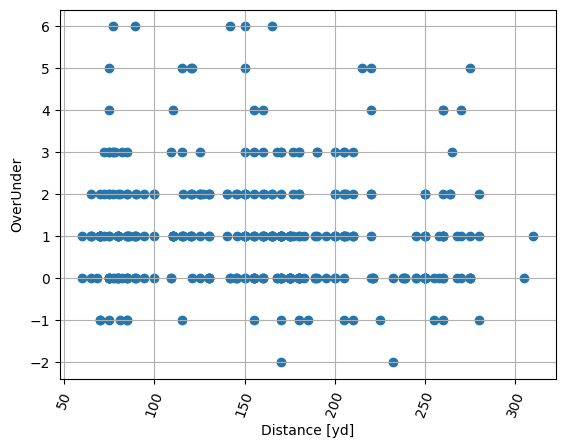

In [25]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Distance [yd]")
plt.ylabel("OverUnder")
plt.grid(True)

    
ax.scatter(dfScoreOverDistance['Distance'], dfScoreOverDistance['OverUnder'])

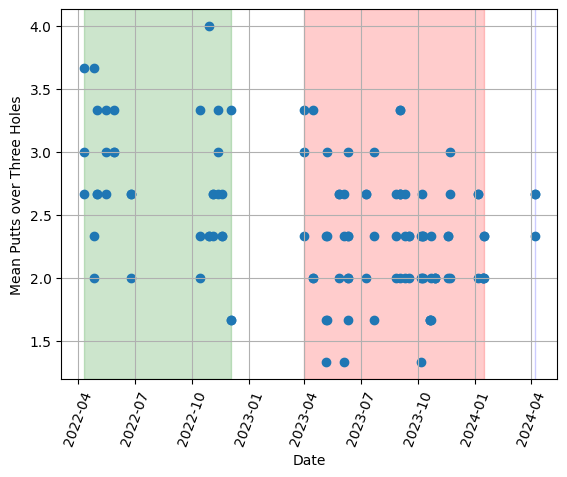

In [26]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Mean Putts over Three Holes")
plt.grid(True)
dateDictionary[division] = {"Max":maxDate, "Min":minDate}

for i, (division) in enumerate(divisions):
    localDict = dateDictionary[division]
    plt.axvspan(localDict["Min"], localDict["Max"], color = colors[i], alpha = 0.2)
    
ax.scatter(dfPutts.index, dfPutts['Putts'])

               Par 3     Par 4     Par 5
Date                                    
2022-04-10  5.000000  6.666667  7.333333
2022-04-26  5.000000  6.600000  4.000000
2022-05-01  6.000000  5.000000  6.500000
2022-05-15  4.000000  5.600000  8.000000
2022-05-28  4.000000  6.200000  7.000000
2022-06-25  3.666667  5.666667  8.333333
2022-10-15  5.500000  4.400000  6.000000
2022-10-29  6.500000  5.600000  6.500000
2022-11-05  3.000000  6.000000  6.333333
2022-11-13  5.000000  5.800000  6.500000
2022-11-19  3.500000  5.000000  6.500000
2022-12-03  3.000000  5.333333  6.666667
2023-04-01  7.000000  4.800000  7.000000
2023-04-15  4.000000  5.400000  7.000000
2023-05-06  3.000000  4.333333  5.333333
2023-05-07  3.500000  6.833333  6.000000
2023-05-27  4.333333  4.666667  5.333333
2023-06-04  5.000000  4.800000  6.000000
2023-06-10  4.000000  4.666667  5.000000
2023-06-11  3.000000  5.400000  7.500000
2023-07-09  4.000000  5.000000  6.000000
2023-07-22  4.000000  5.400000  5.000000
2023-08-27  4.50

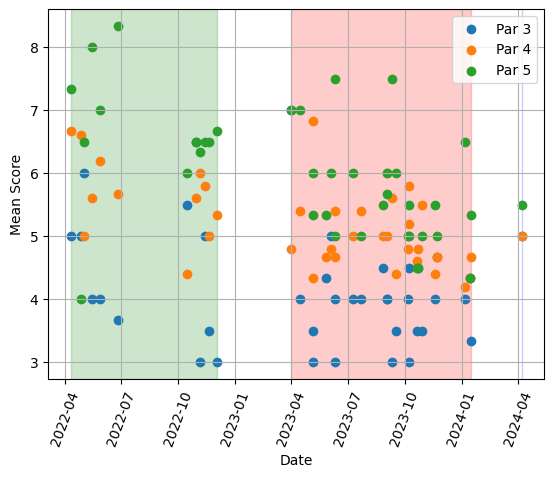

In [27]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Mean Score")
plt.grid(True)
for i, (division) in enumerate(divisions):
    localDict = dateDictionary[division]
    plt.axvspan(localDict["Min"], localDict["Max"], color = colors[i], alpha = 0.2)
   
   
ax.scatter(dfHoleAverage.index, dfHoleAverage['Par 3'], label='Par 3')
ax.scatter(dfHoleAverage.index, dfHoleAverage['Par 4'], label='Par 4')
ax.scatter(dfHoleAverage.index, dfHoleAverage['Par 5'], label='Par 5')
ax.legend()

print(dfHoleAverage)

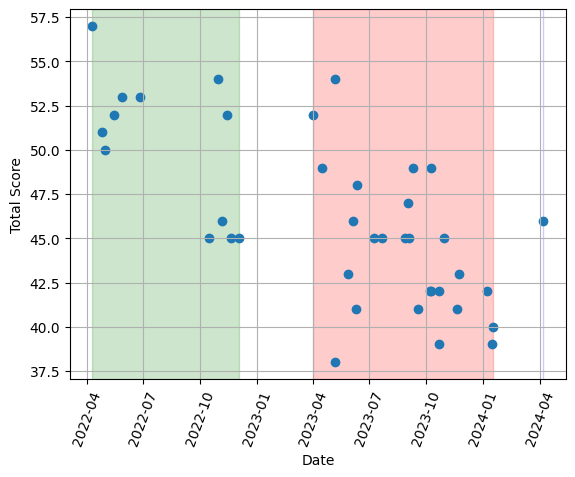

In [28]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Total Score")
plt.grid(True)
for i, (division) in enumerate(divisions):
    localDict = dateDictionary[division]
    plt.axvspan(localDict["Min"], localDict["Max"], color = colors[i], alpha = 0.2)
   
   
ax.scatter(dfScore.index, dfScore['Score'])

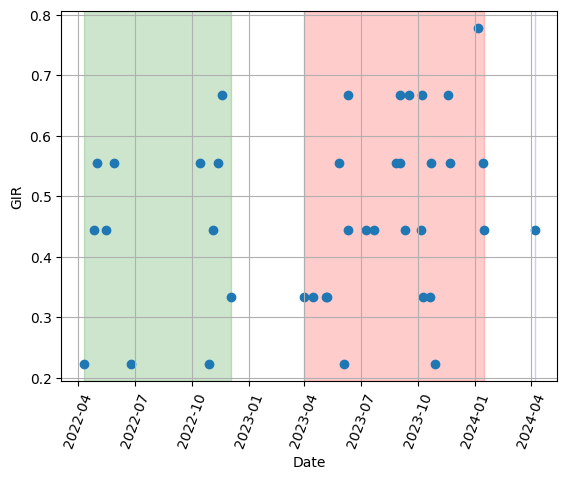

In [31]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("GIR")
plt.grid(True)
for i, (division) in enumerate(divisions):
    localDict = dateDictionary[division]
    plt.axvspan(localDict["Min"], localDict["Max"], color = colors[i], alpha = 0.2)
   
   
ax.scatter(dfGirAverage.index, dfGirAverage['GIR'])

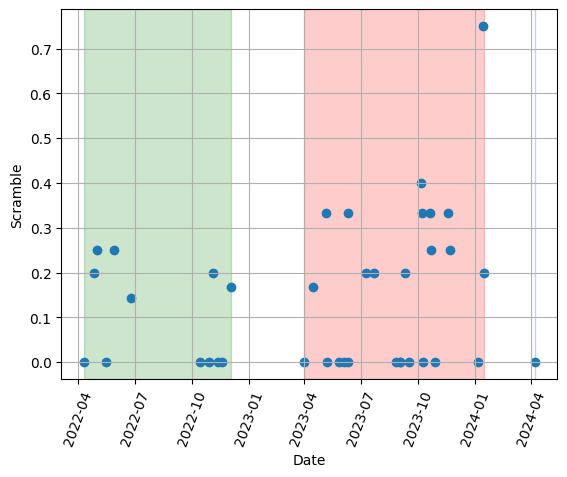

In [30]:
fig,ax =plt.subplots()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Scramble")
plt.grid(True)
for i, (division) in enumerate(divisions):
    localDict = dateDictionary[division]
    plt.axvspan(localDict["Min"], localDict["Max"], color = colors[i], alpha = 0.2)
   
   
ax.scatter(dfScrambleAvg.index, dfScrambleAvg['Scramble'])